In [ ]:
## Exercise - Landau Section 8.5: Solution for Nonlinear Oscillations
## Exercise - Landau Section 8.5.1: Precision Assessment via E Conservation
## Exercise – Landau Section 8.6.1: Friction
## (Grad Students) Exercise - Landau Section 8.6.3: Time-Dependent Forces

# Lecture 8: Chapter 8 Ordinary Differential Equations

## Exercise – Landau 8.4.4: Assessment RK2 versus RK4 versus RK45

 <span style="color: green;">They provide `rk4.py` and `rk45.py` codes to use. They also have a `rk2.py` file, and give the algorithm in eq (8.38),(8.39).  
 In website I only found `rk4Algor.py`.</span>


1) Write your own **RK2** method, with the derivative function $ f(t,x) $ as a separate method.
  rk2 algorithm:
$$
y_{n+1} ≃ y_n +k_2, (rk2) \tag{8.38}
$$

$$
k_2 = hf (t_n + \frac{h}{2}, y_n + \frac{k_1}{2} ),\quad k_1 = hf(t_n, y_n), \tag{8.39}
$$

In [1]:
import numpy as np

def rk2(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N)
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    y=y+k2
    return y   

2) Use your **RK2** to solve the equation of motion **(8.7) or (8.26)**. Plot both the position $ x(t) $ and velocity $ dx/dt $ as functions of time.

$$
m \frac{d^2x}{dt^2} = F_{\text{ext}}(x,t) - kx^{p-1}. \tag{8.7}
$$
$$
\frac{dy^{(0)}}{dt} = y^{(1)}(t), \quad \frac{dy^{(1)}}{dt} = \frac{1}{m} \left[ F_{\text{ext}}(x,t) - k y^{(0)}(t)^{p-1} \right]. \tag{8.26}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# f(t, y) based on equation (8.26)
def f(t, y, m, k, p, F_ext):
    """
    Computes dy/dt for the system:
    y[0] -> position x(t)
    y[1] -> velocity dx/dt
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # dy(0)/dt = velocity
    dydt[1] = (1/m) * (F_ext(y[0], t) - k * y[0]**(p-1))  # dy(1)/dt = acceleration
    return dydt


# Define external force function F_ext(x, t)
def F_ext(x, t):
    return 0  #No external force

# Wrapper for f to match rk2 input
def f_wrapper(t, y):
    return f(t, y, m, k, p, F_ext)

<span style="color: green;"><b> Comment:</b>  
        I decided to work with `eq 8.26` since is easier to manipulate two 1st order differential equations than one 2nd order.
        My function `f` takes all the needed parameters in the eq and returns an array with 1 array for each of the equations
        `Eq 8.26` has an Fext term that I dont know if im going to use so i defined it as a separate function and set it to zero for now
        My `rk2` function takes different parametes than `f` function so i made a wrapper to handle that so i don't have to rewrite `rk2`</span>

3) Once your ODE solver is running, do a number of things to check that it is working well and that you know what $ h $ values to use:
   - **(a)** Adjust the parameters in your potential so that it corresponds to a pure harmonic oscillator (set $ p = 2 $ or $ \alpha = 0 $).  
     For an oscillator initially at rest, we have an analytic result with which to compare:
     $$
     x(t) = A \sin(\omega_0 t), \quad v = \omega_0 A \cos(\omega_0 t), \quad \omega_0 = \sqrt{k/m}. \tag{8.45}
     $$

In [3]:
# Define analytic solution for comparison
def analytic_solution(t, A, omega0):
    '''
    Evaluates the analytic solution directly 
    It comes from eq 8.45
    Inputs:
        t, an array for all times
        A, is constant 
        omega0, from k and m.
    Returns position and velocity
    '''
    #x = A * np.sin(omega0 * t )#+ np.pi/2) #shift this guy to match the numerical solution
    #v = omega0 * A * np.cos(omega0 * t )#+ np.pi/2) #shift this guy to match the numerical solution

    # even better lets rewrite it with cos instead of sin
    x = A * np.cos(omega0 * t)  # Use cos() to start at x=A
    v = -omega0 * A * np.sin(omega0 * t) 
    return x, v

In [10]:
def plotGraphs(t0,t_final, y0 ,h=.1,m=1.,k=1.,p=2,A=1.):
    omega0 = np.sqrt(k/m)
     
    N_steps = int((t_final - t0) / h)
    t_values = np.linspace(t0, t_final, N_steps)
    y_values = np.zeros((N_steps, 2))
    y_values[0] = y0 #array with inital velocity and position
    
    # Solve numerically
    y = y0.copy() #we stack values on a copy not the original array
    for i in range(1, N_steps):
        y = rk2(t_values[i-1], h, 2, y, f_wrapper) 
        y_values[i] = y
    
    # Evaluate analytic
    x_analytic, v_analytic = analytic_solution(t_values, A, omega0)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t_values, y_values[:, 0], label=f'Numerical', linestyle='--')
    plt.plot(t_values, x_analytic, label=f'Analytic', alpha=0.6)
    
    
    plt.subplot(2, 1, 2)
    plt.plot(t_values, y_values[:, 1], label=f'Numerical', linestyle='--')
    plt.plot(t_values, v_analytic, label=f'Analytic', alpha=0.6)
    
    
    plt.subplot(2, 1, 1)
    plt.xlabel("Time $t$")
    plt.ylabel("Position $x(t)$")
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.xlabel("Time $t$")
    plt.ylabel("Velocity $dx/dt$")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

- **(b)** Pick values of $ k $ and $ m $ such that the period $ T = 2\pi/\omega $ is a nice number to work with (something like $ T = 1 $).
- **(c)** Start with a step size $ h \approx T/5 $ and make $ h $ smaller until the solution looks smooth, has a period that remains constant for a large number of cycles, and agrees with the analytic result. Always try to start with a large $ h $ so that you can see a bad solution turn good.
- **(d)** Make sure that you have exactly the same initial conditions for the analytic and numerical solutions (zero displacement, nonzero velocity), and then plot the two together. It is good if you cannot tell them apart, yet that is not much of a test since it only ensures approximately two places of agreement.

Running with h = 0.20000


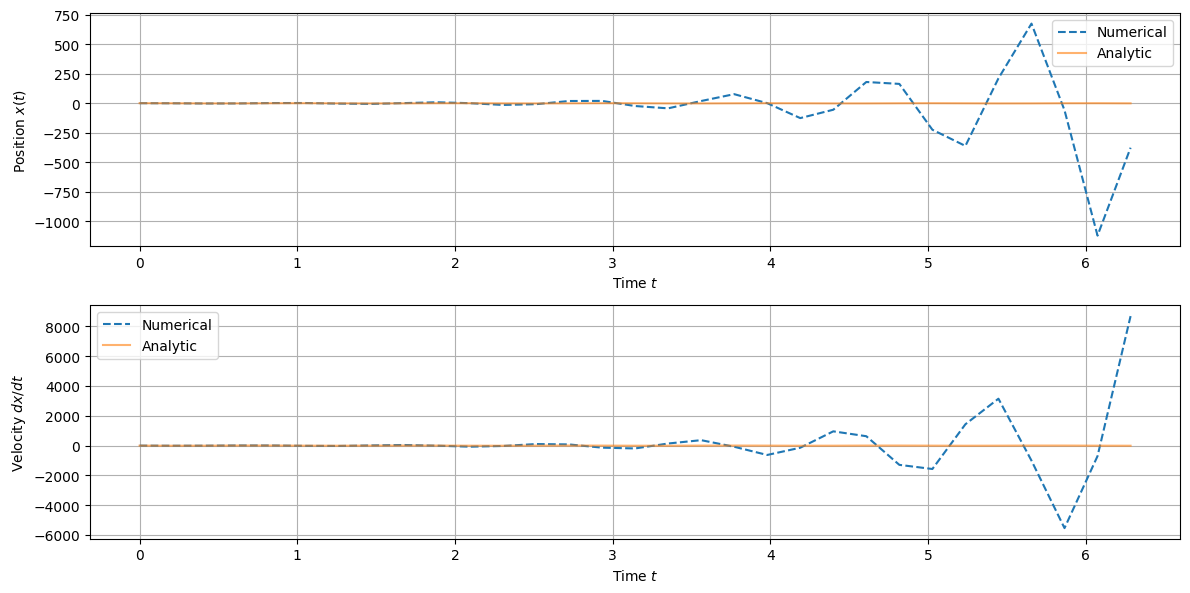

Running with h = 0.10000


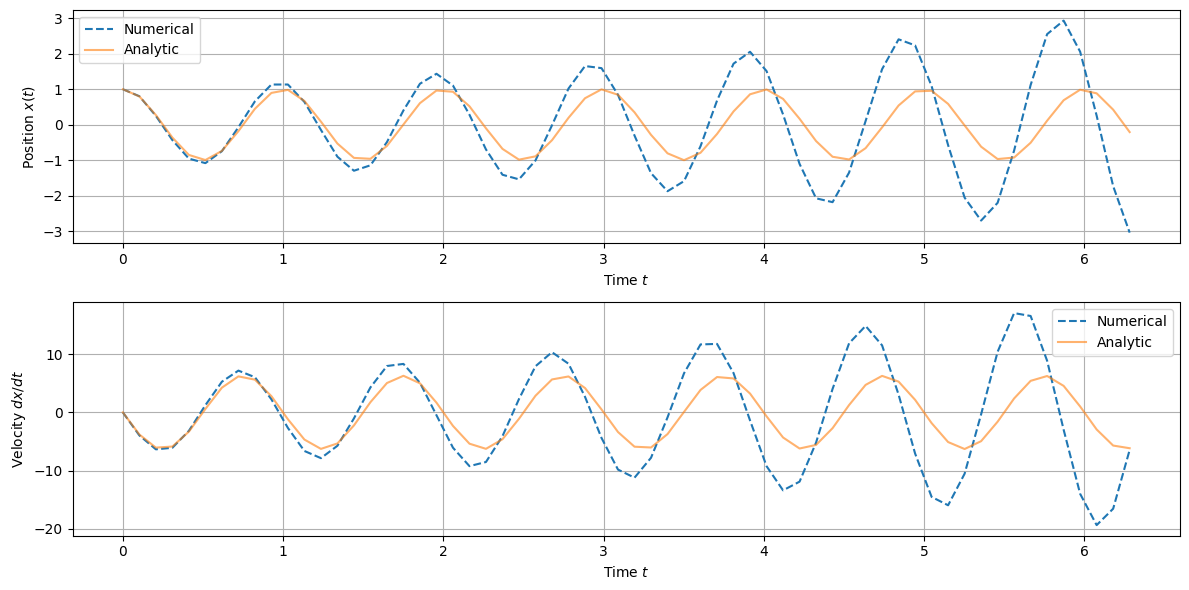

Running with h = 0.05000


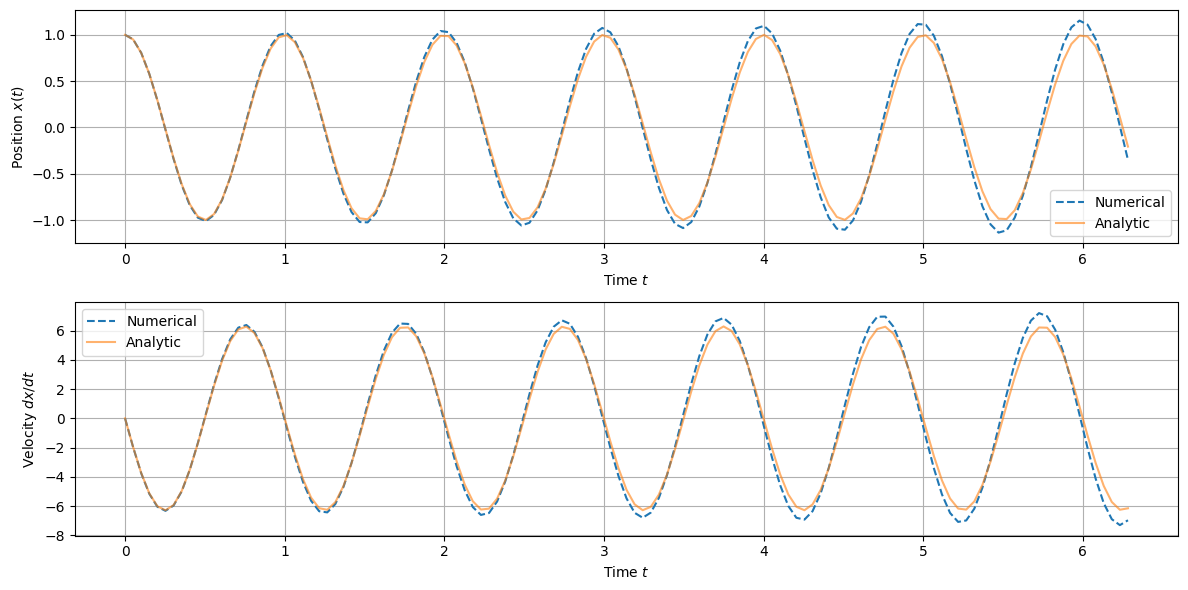

Running with h = 0.02000


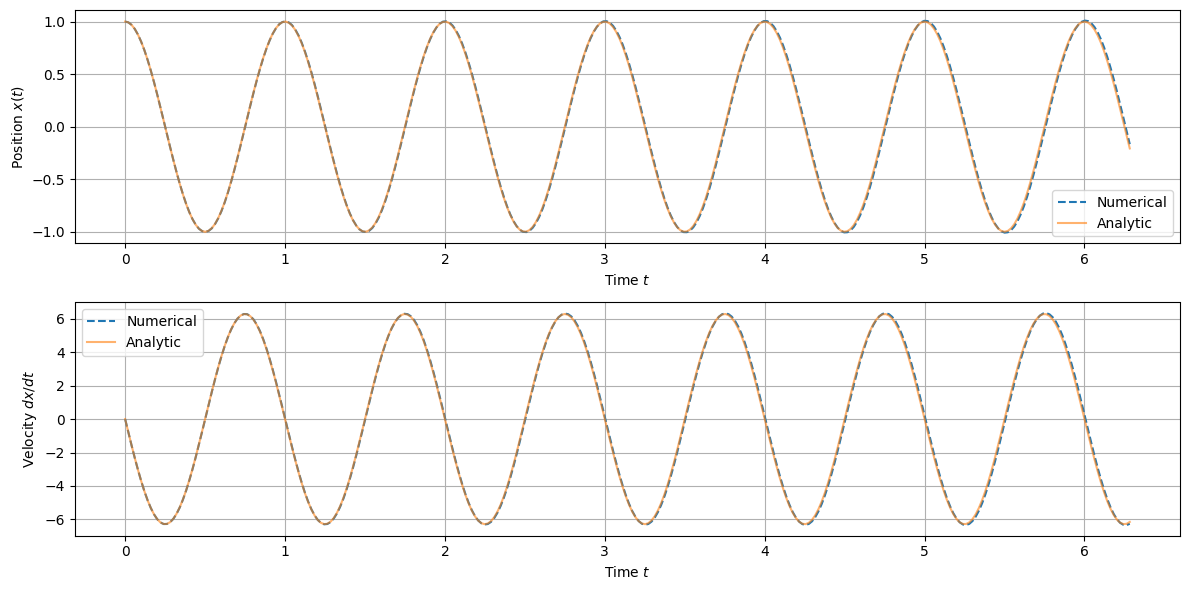

Running with h = 0.01000


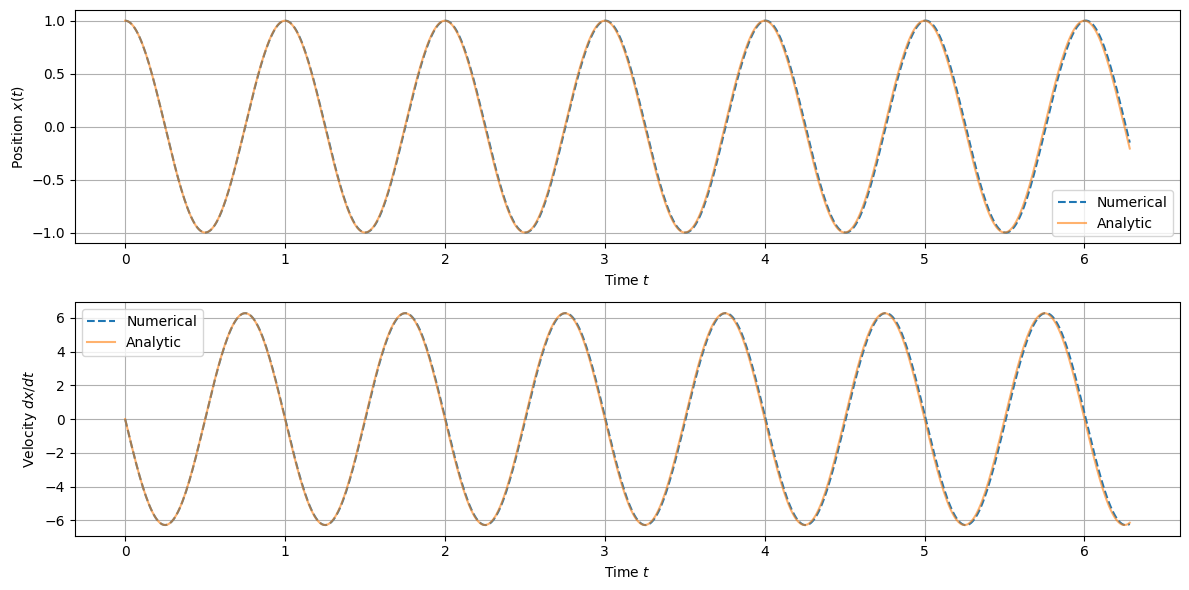

In [13]:
t0=0.0
t_final=2*np.pi
A=1.
y0 = np.array([A, 0.0]) # [Initial Position, Initial Velocity]

#b)
m=1. # if m = 1
k=4 * np.pi ** 2 # then k must be 4pi^2 for T = 1
p=2 #set to 2 so is simple harmonic

# check T, find T for c)
omega0 = np.sqrt(k/m)
T = 2*np.pi / omega0

#c) we can cycle here
h_values = [T/5, T/10, T/20, T/50, T/100]  # Start large, decrease

# Run multiple simulations with different h values
for h in h_values:
    print(f"Running with h = {h:.5f}")
    plotGraphs(t0, t_final, y0, h, m, k, p, A)

- **(e)** Try different initial velocities and verify that a harmonic oscillator is **isochronous**, that is, that its period does not change as the amplitude varies.


Running with initial velocity v0 = 0.00


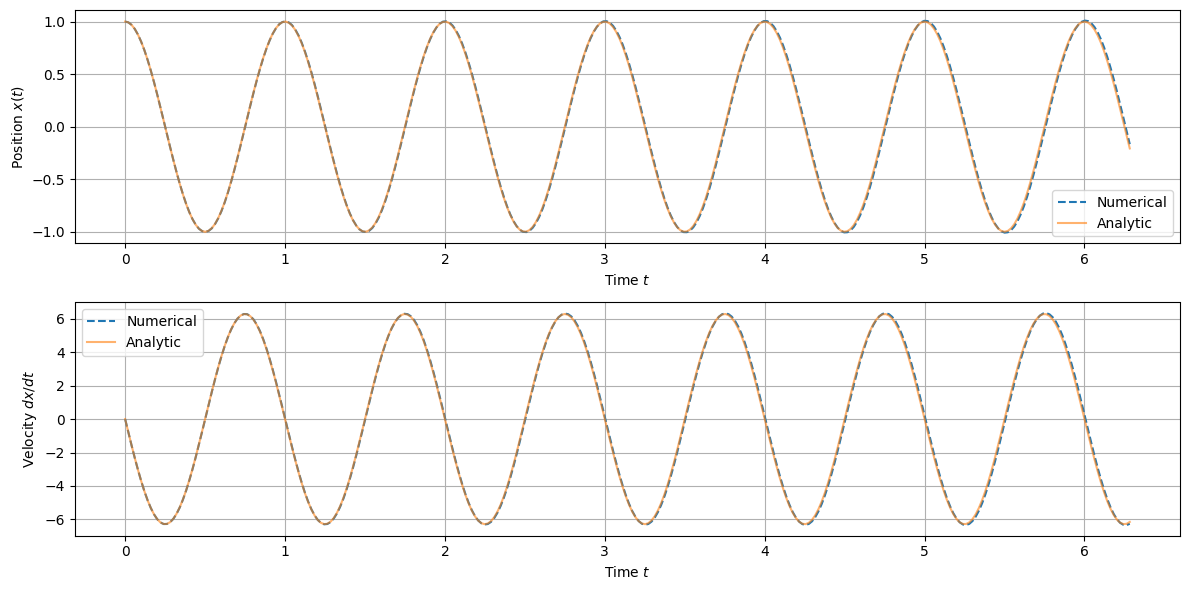

Running with initial velocity v0 = 1.00


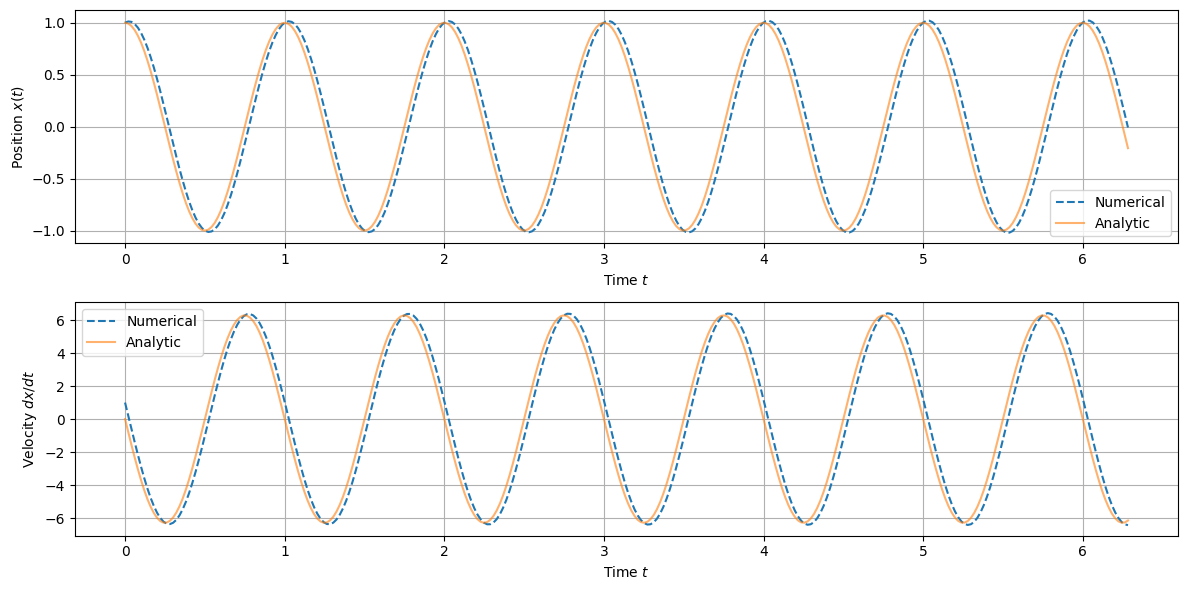

Running with initial velocity v0 = 2.00


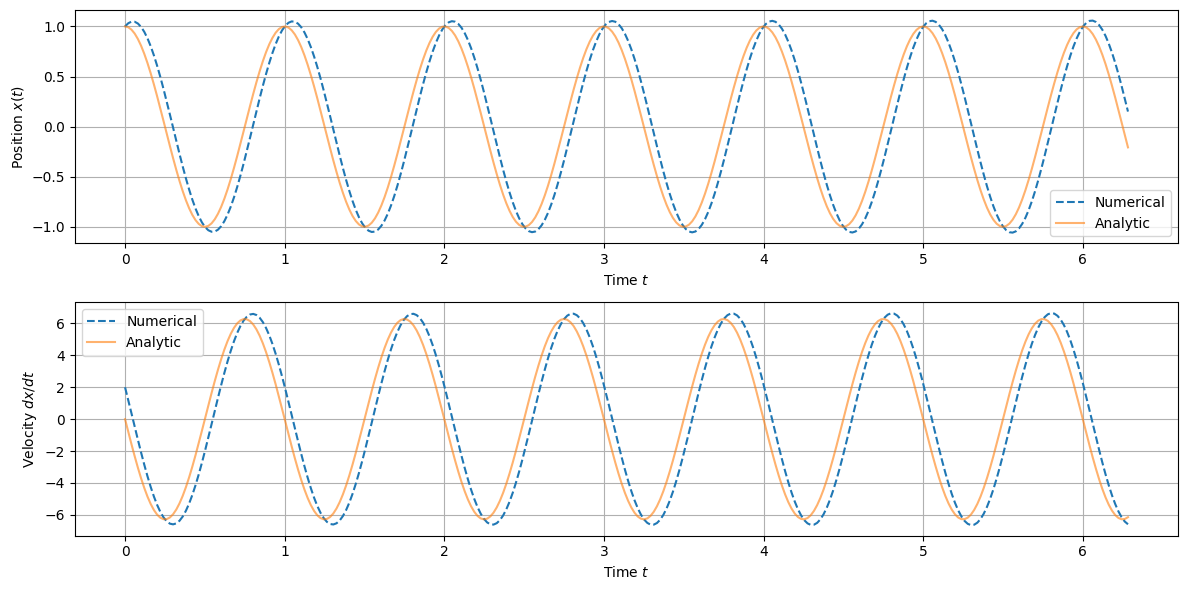

Running with initial velocity v0 = -1.00


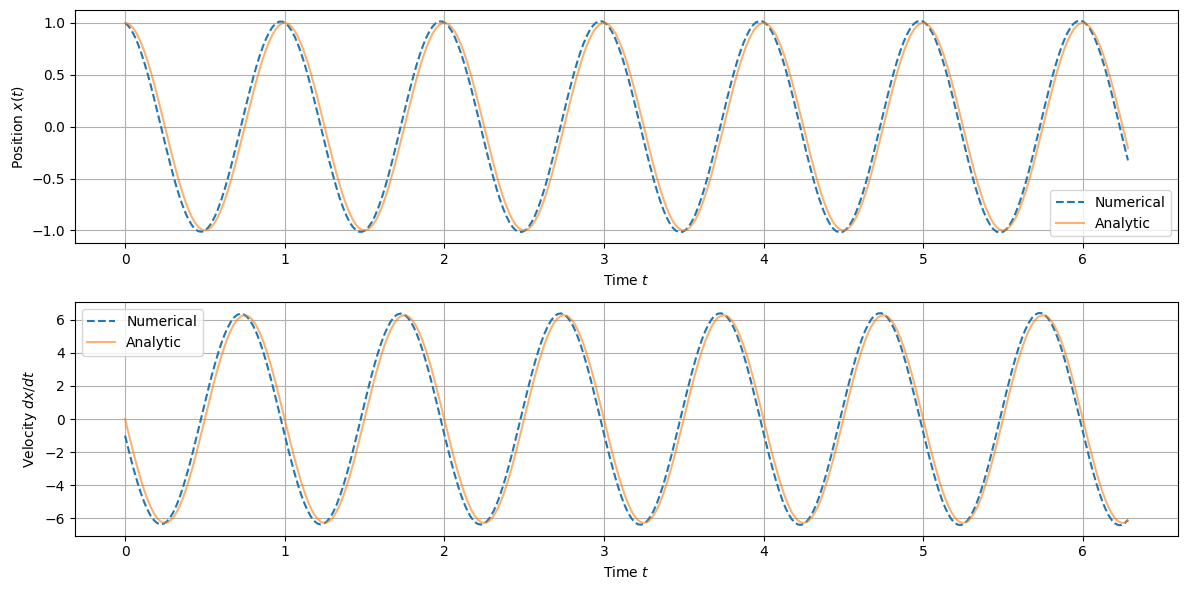

Running with initial velocity v0 = -2.00


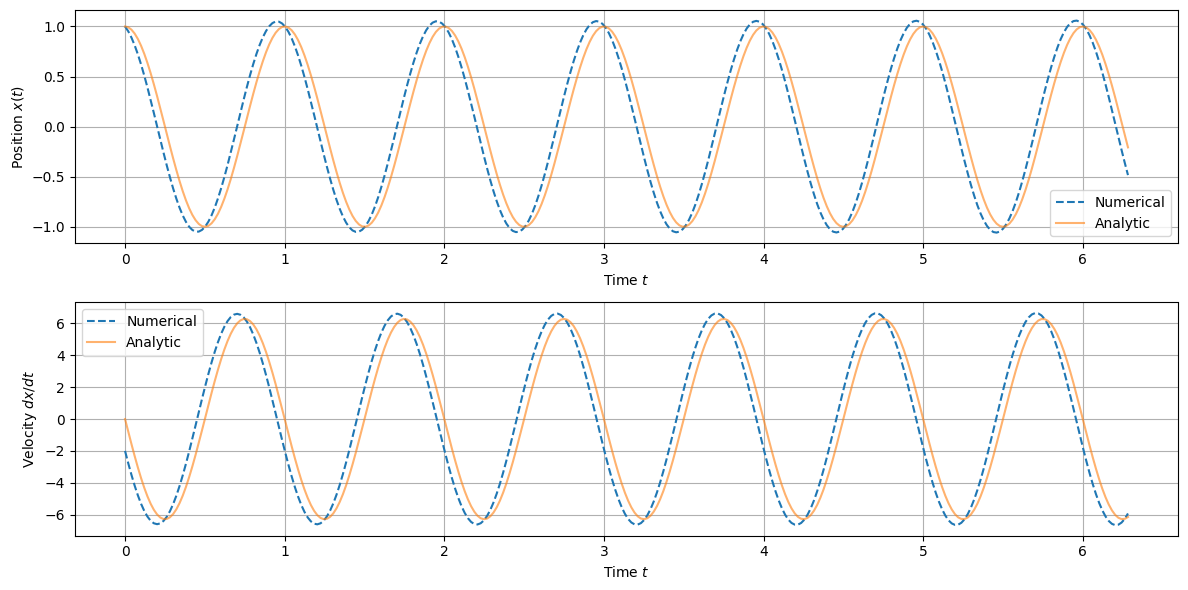

In [9]:
initial_velocities = [0.0, 1.0, 2.0, -1.0, -2.0]
h = T/50 #good enough

# Loop over different initial velocities
for v0 in initial_velocities:
    print(f"Running with initial velocity v0 = {v0:.2f}")
    y0 = np.array([A, v0])  # Modify initial velocity
    plotGraphs(t0, t_final, y0, h, m, k, p, A)

<span style="color: green;"><b> Comment:</b>  
    Analytic solution does not change since we are not changing its initial conditions, A or omega0
</span>

4) Now that you know you can get a good solution of an ODE with **RK2**, compare the solutions obtained with the **RK2**, **RK4**, and **RK45** solvers.

In [25]:
def rk4(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2/2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y 

def rk45(t, h, N, y, f,Tol=1e-6, hmin=1e-6, hmax=0.1):
    '''
    Takes same parameters as rk2 and rk4
    
    Added parameters Tol=1e-6, hmin=1e-6, hmax=0.1
    So it can be adaptative as in book code

    Calculates each k and uses them to get two estimates,
    compares and adjusts h
    returns y_new, t_new, h_new
    y_new final solution
    t_new, h_new, updated time and updated step size 
    '''
    #k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N); k5=np.zeros(N); k6=np.zeros(N)
    #no initialize since this is an adaptative method
    k1 = h * f(t, y)
    k2 = h * f(t + h/4., y + k1/4.)
    k3 = h * f(t + 3*h/8., y + (3*k1 + 9*k2) / 32.)
    k4 = h * f(t + 12*h/13., y + (1932*k1 - 7200*k2 + 7296*k3) / 2197.)
    k5 = h * f(t + h, y + (439*k1 / 216. - 8*k2 + 3680*k3 / 513. - 845*k4 / 4104.))
    k6 = h * f(t + h/2., y + (-8*k1 / 27. + 2*k2 - 3544*k3 / 2565. + 1859*k4 / 4104. - 11*k5 / 40.))

    # 4th-order estimate (used for comparison)
    y4 = y + (25*k1 / 216. + 1408*k3 / 2565. + 2197*k4 / 4104. - k5 / 5.)
    
    # 5th-order estimate (more accurate)
    y5 = y + (16*k1 / 135. + 6656*k3 / 12825. + 28561*k4 / 56430. - 9*k5 / 50. + 2*k6 / 55.)

    # error estimate
    error = np.abs(y5 - y4)

    # scale factor for step size adjustment
    s = 0.84 * (Tol * h / np.max(error))**0.25 if np.max(error) > 0 else 1.0

    # Adjust step size
    if np.max(error) > Tol:  # Error too large, decrease step size
        h_new = max(h / 2, hmin)  # Reduce step size, but don't go below hmin
        return y, t, h_new  # nope, try again with smaller h

    elif np.max(error) < Tol / 4:  # Error very small, increase step size
        h_new = min(h * 2, hmax)  # Increase step size, but don't exceed hmax
    else:
        h_new = h  # Keep step size

    # good step and update y and t
    y_new = y5  # Use the 5th-order more accurate estimate
    t_new = t + h

    return y_new, t_new, h_new

In [28]:
def plotRKComparison(t0, t_final, h=0.1, m=1., k=1., p=2, y0=np.array([1.0, 0.0])):
    """
    Plots the solutions using RK2, RK4, and RK45 for comparison.
    """
    omega0 = np.sqrt(k/m)

    # Time setup
    N_steps = int((t_final - t0) / h)
    t_values = np.linspace(t0, t_final, N_steps)

    # Storage for solutions
    y_values_rk2 = np.zeros((N_steps, 2))
    y_values_rk4 = np.zeros((N_steps, 2))
    #y_values_rk45 = np.zeros((N_steps, 2)) adaptative
    y_values_rk45 = []

    y_values_rk2[0] = y0  # Initial condition for RK2
    y_values_rk4[0] = y0  # Initial condition for RK4
    #y_values_rk45[0] = y0  

    # Solve using RK2
    y = y0.copy()
    for i in range(1, N_steps):
        y = rk2(t_values[i-1], h, 2, y, f_wrapper)
        y_values_rk2[i] = y

    # Solve using RK4
    y = y0.copy()
    for i in range(1, N_steps):
        y = rk4(t_values[i-1], h, 2, y, f_wrapper)
        y_values_rk4[i] = y

    # Solve using RK45
    y = y0.copy()
    t = t0
    h_rk45 = h  # Initial step size
    t_rk45_values = [t]  # Store adaptive time steps
    y_values_rk45.append(y.copy())

    while t < t_final:
        y, t, h_rk45 = rk45(t, h_rk45, 2, y, f_wrapper)
        y_values_rk45.append(y.copy())
        t_rk45_values.append(t)

    y_values_rk45 = np.array(y_values_rk45)
    t_rk45_values = np.array(t_rk45_values)

    # Convert lists to NumPy arrays for plotting
    y_values_rk45 = np.array(y_values_rk45)
    t_rk45_values = np.array(t_rk45_values)

    # Evaluate analytic solution
    x_analytic, v_analytic = analytic_solution(t_values, y0[0], omega0)

    # Plot Position Comparison
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t_values, y_values_rk2[:, 0], 'b--', label='RK2')
    plt.plot(t_values, y_values_rk4[:, 0], 'g-.', label='RK4')
    plt.plot(t_rk45_values, y_values_rk45[:, 0], 'm:', label='RK45 Adaptive')
    plt.plot(t_values, x_analytic, 'r', label='Analytic')
    plt.xlabel("Time $t$")
    plt.ylabel("Position $x(t)$")
    plt.legend()
    plt.grid()

    # Plot Velocity Comparison
    plt.subplot(2, 1, 2)
    plt.plot(t_values, y_values_rk2[:, 1], 'b--', label='RK2')
    plt.plot(t_values, y_values_rk4[:, 1], 'g-.', label='RK4')
    plt.plot(t_rk45_values, y_values_rk45[:, 1], 'm:', label='RK45 Adaptive')
    plt.plot(t_values, v_analytic, 'r', label='Analytic')
    plt.xlabel("Time $t$")
    plt.ylabel("Velocity $dx/dt$")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

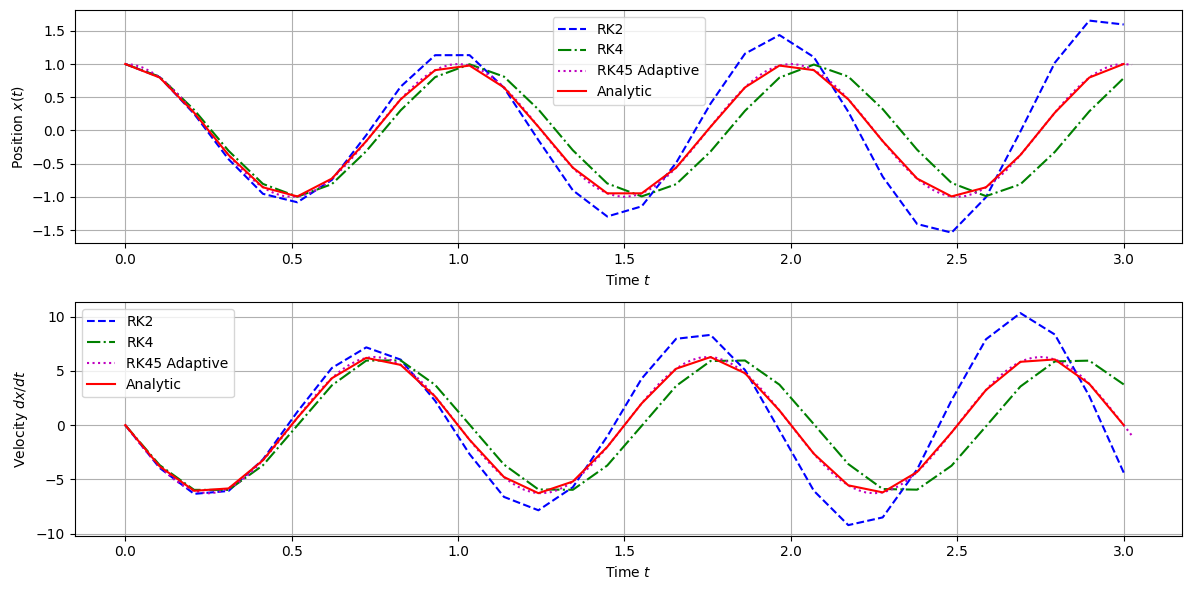

In [29]:
# Set parameters
t0 = 0.0
t_final = 3  # Multiple periods
m = 1.0
k = 4 * np.pi**2  # for T = 1
p = 2  # Harmonic oscillator
y0 = np.array([1, 0.0])  # Initial conditions

# Compute period
omega0 = np.sqrt(k/m)
T = 2 * np.pi / omega0
h = T / 10  # Kinda good step size 

# Compare RK2 vs RK4 vs RK45
plotRKComparison(t0, t_final, h, m, k, p, y0)


5) Make a table of comparisons similar to **Table 8.1**, where we compare **RK4** and **RK45** for the two equations:
   $$
   2y y'' + y^2 - (y')^2 = 0, \tag{8.46}
   $$
   $$
   y'' + 6y^5 = 0, \tag{8.47}
   $$
   with initial conditions $[y(0), y'(0)] = [1,1]$. Although nonlinear, **(8.46)** does have the analytic solution:
   $$
   y(t) = 1 + \sin t.
   $$
   Equation **(8.47)** corresponds to our standard potential **(8.5)**, with $ p = 6 $.

In [31]:
def f_846(t, y):
    """
    Function for equation (8.46): 
    2y y'' + y^2 - (y')^2 = 0
    Rewrite as a system:
    y1' = y2
    y2' = [(y2)^2 - y1^2] / (2 * y1)
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # y' = vel
    dydt[1] = (y[1]**2 - y[0]**2) / (2 * y[0])  # Acc
    return dydt

def f_847(t, y):
    """
    Function for equation (8.47):
    y'' + 6y^5 = 0
    Rewrite as a system:
    y1' = y2
    y2' = -6 * y1^5
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # y' = vel
    dydt[1] = -6 * y[0]**5  # Acc
    return dydt

def y_analytic_846(t):
    """Analytical solution for Equation (8.46): y(t) = 1 + sin(t)"""
    return 1 + np.sin(t)

In [34]:
import time

def run_solver(method, solver, f, h_init, t_final, eq_number, compute_error=False):
    """
    Runs RK4 or RK45 and collects:
    - Number of function evaluations (flops)
    - Execution time
    - Relative error (if applicable)
    """
    t0 = 0.0
    y0 = np.array([1.0, 1.0])  # [y(0), y'(0)]
    
    y = y0.copy()
    t = t0
    h = h_init
    flops = 0  # Count function evaluations

    # start execution time
    start_time = time.time()

    y_values = []
    t_values = []

    # Solve
    while t < t_final:
        if method == "RK4":
            y = solver(t, h, 2, y, f)
            t += h
        else:  # RK45
            y, t, h = solver(t, h, 2, y, f)

        y_values.append(y[0])
        t_values.append(t)
        flops += 1

    exec_time = (time.time() - start_time) * 1000 

    # Compute relative error, only if set to true
    rel_error = None
    if compute_error:
        y_exact = np.array([y_analytic_846(t) for t in t_values])
        rel_error = np.mean(np.abs((np.array(y_values) - y_exact) / y_exact))

    # Print the results
    print(f"({eq_number})".ljust(8), method.ljust(6), f"{h_init:.2f}".ljust(10), f"{flops}".ljust(12), f"{exec_time:.1f}".ljust(10),
          f"{rel_error:.2e}" if rel_error is not None else "")

In [37]:
# Print header
print("\n" + "Table for Comparison of ODE solvers for given equations")
print("-" * 75)
print("Eqn No.".ljust(8), "Method".ljust(6), "Initial h".ljust(10), "No. of flops".ljust(12), "Time (ms)".ljust(10), "Relative error")
print("-" * 75)

# Eq 8.46 (Analytical solution exists)
run_solver("RK4", rk4, f_846, 0.01, 10.0, "8.46", compute_error=True)
run_solver("RK45", rk45, f_846, 1.0, 10.0, "8.46", compute_error=True)

# Eq 8.47 (No analytical solution)
run_solver("RK4", rk4, f_847, 0.01, 10.0, "8.47", compute_error=False)
run_solver("RK45", rk45, f_847, 0.1, 10.0, "8.47", compute_error=False)

print("-" * 75)



Table for Comparison of ODE solvers for given equations
---------------------------------------------------------------------------
Eqn No.  Method Initial h  No. of flops Time (ms)  Relative error
---------------------------------------------------------------------------
(8.46)   RK4    0.01       1001         30.4       5.45e-01
(8.46)   RK45   1.00       191          18.1       3.15e-01
(8.47)   RK4    0.01       1001         14.7       
(8.47)   RK45   0.10       371          21.7       
---------------------------------------------------------------------------
